Five-Number Summary:
Minimum: 4.0
First Quartile: 8.0
Median: 10.0
Third Quartile: 11.0
Maximum: 16.0
Theoretical Expected Sum: 2.25


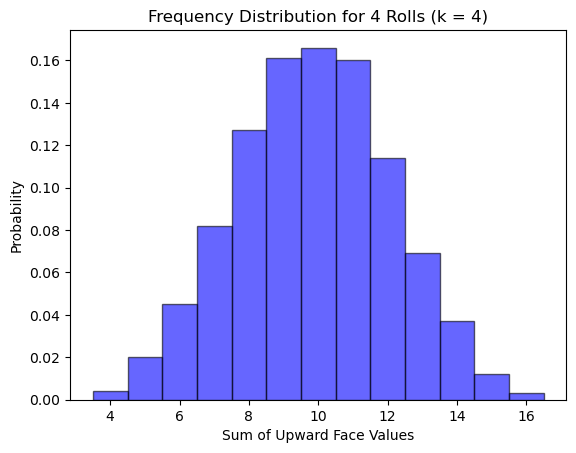

In [16]:
import random
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
# Constants
k = 4
num_simulations = 1000
num_rolls = 4

# Function to roll the die and calculate the sum
def roll_die(num_rolls):
    return sum(random.randint(1, k) for _ in range(num_rolls))

# Simulate and collect results
results = [roll_die(num_rolls) for _ in range(num_simulations)]

# Plot a histogram
plt.hist(results, bins=np.arange(num_rolls, k * num_rolls + 2) - 0.5, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Probability')
plt.title(f'Frequency Distribution for {num_rolls} Rolls (k = {k})')

# Calculate the five-number summary
summary = np.percentile(results, [0, 25, 50, 75, 100])
print("Five-Number Summary:")
print(f"Minimum: {summary[0]}")
print(f"First Quartile: {summary[1]}")
print(f"Median: {summary[2]}")
print(f"Third Quartile: {summary[3]}")
print(f"Maximum: {summary[4]}")

# Calculate theoretical expected sum
expected_sum = sum(i * (1 / (2 ** (i - 1))) for i in range(2, k + 1))
print(f"Theoretical Expected Sum: {expected_sum}")

# Show the plot
plt.show()


In [13]:


# Fetch the dataset
spambase = fetch_ucirepo(id=94)

# Split the data into train, validation, and test sets (70:15:15 split)
X = spambase.data.features
y = spambase.data.targets

# Convert to numpy arrays
X = X.values
y = y.values

# Convert target to 1-D array
y = np.ravel(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


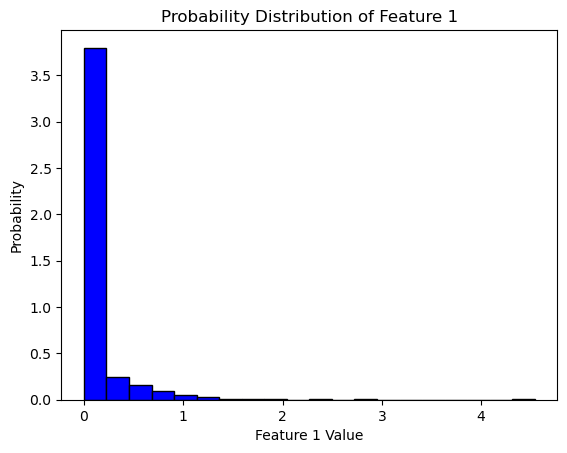

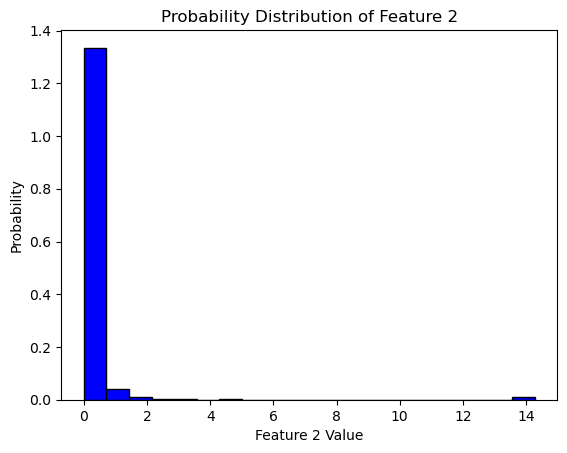

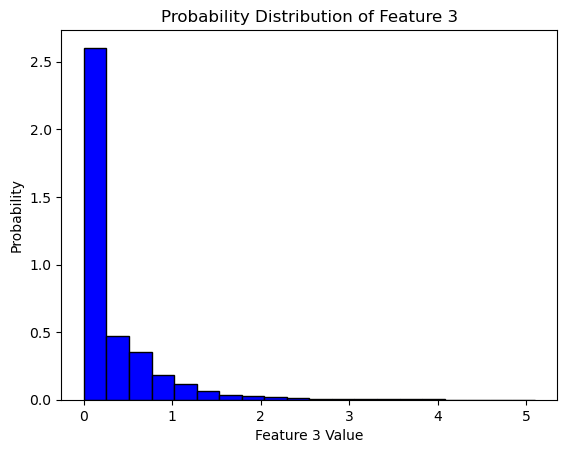

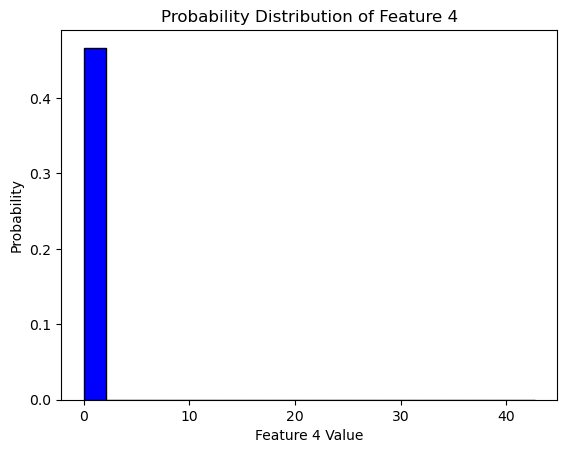

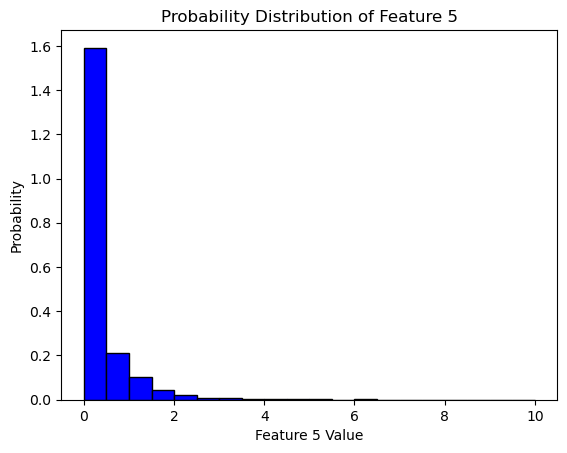

In [14]:
import matplotlib.pyplot as plt

# Choose any 5 columns from the dataset (e.g., the first 5 features)
columns_to_plot = X_train[:, :5]

# Plot probability distributions for each selected column
for i, column in enumerate(columns_to_plot.T):
    plt.figure()
    plt.hist(column, bins=20, density=True, color='blue', edgecolor='black')
    plt.xlabel(f'Feature {i+1} Value')
    plt.ylabel('Probability')
    plt.title(f'Probability Distribution of Feature {i+1}')
    plt.show()


In [15]:
total_samples = len(y_train)
spam_samples = sum(y_train)
non_spam_samples = total_samples - spam_samples

prior_spam = spam_samples / total_samples
prior_non_spam = non_spam_samples / total_samples

print(f'Prior Probability of Spam: {prior_spam:.4f}')
print(f'Prior Probability of Non-Spam: {prior_non_spam:.4f}')


Prior Probability of Spam: 0.3839
Prior Probability of Non-Spam: 0.6161
